<a href="https://colab.research.google.com/github/Bhavnasahu98/Vehicle-Maintenance-needs-using-sensor-data/blob/main/predictive_vehicle_maintenance_needs_using_vehicle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.drop(['Product ID', 'UDI'], axis=1, inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

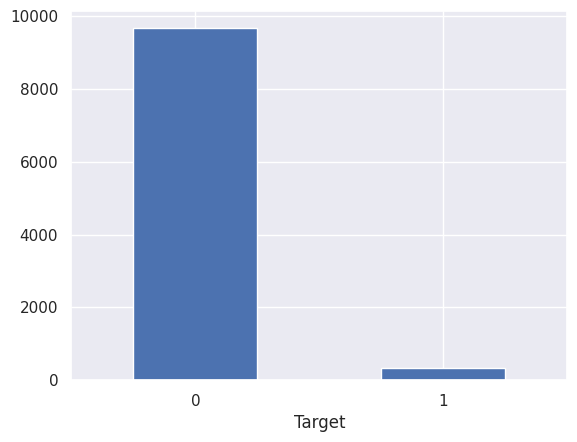

In [ ]:
df['Target'].value_counts().plot.bar(rot=0)
plt.show()

In [ ]:
df['Failure Type'].value_counts()


Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
df['Failure Type'].replace(to_replace=['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures'],
value=['NoF', 'HDF', 'PF', 'OF', 'TWF', 'RF'], inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,NoF
1,L,298.2,308.7,1408,46.3,3,0,NoF
2,L,298.1,308.5,1498,49.4,5,0,NoF
3,L,298.2,308.6,1433,39.5,7,0,NoF
4,L,298.2,308.7,1408,40.0,9,0,NoF


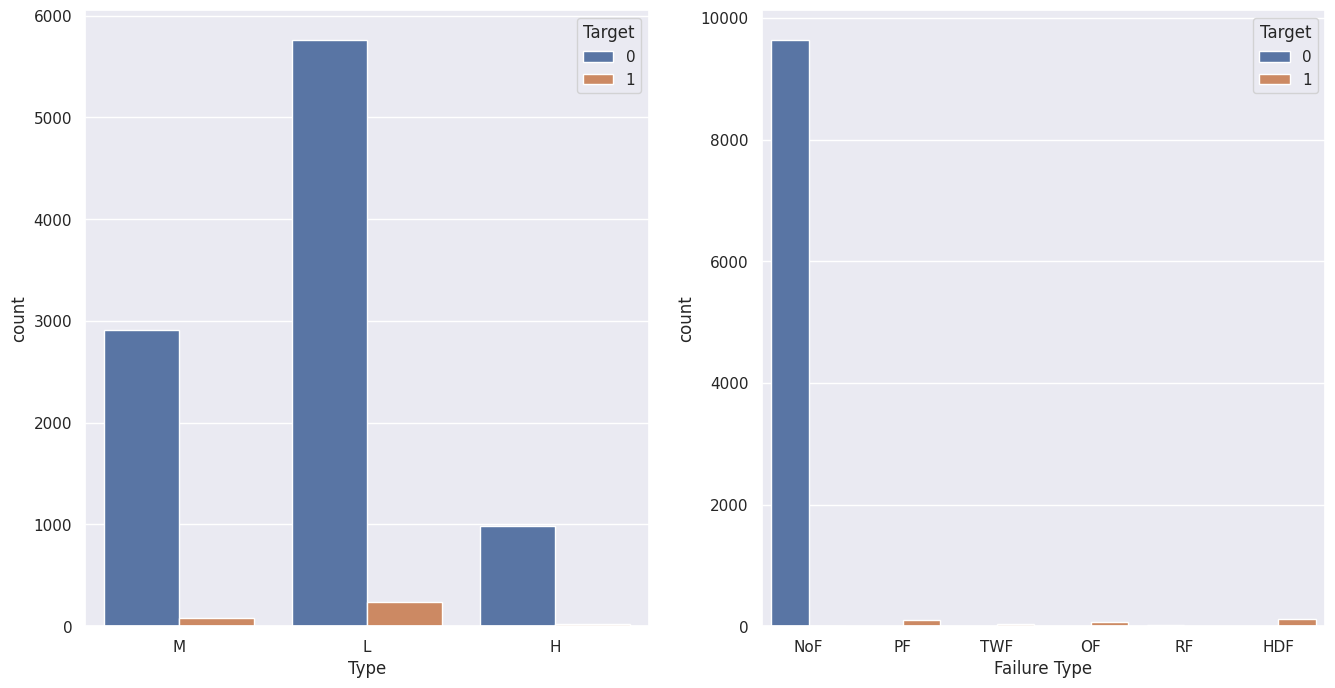

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x="Type", hue="Target", data=df, ax=ax[0])
sns.countplot(x="Failure Type", hue="Target", data=df, ax=ax[1])

plt.show()

In [ ]:
df = pd.get_dummies(df)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_NoF,Failure Type_OF,Failure Type_PF,Failure Type_RF,Failure Type_TWF
0,298.1,308.6,1551,42.8,0,0,False,False,True,False,True,False,False,False,False
1,298.2,308.7,1408,46.3,3,0,False,True,False,False,True,False,False,False,False
2,298.1,308.5,1498,49.4,5,0,False,True,False,False,True,False,False,False,False
3,298.2,308.6,1433,39.5,7,0,False,True,False,False,True,False,False,False,False
4,298.2,308.7,1408,40.0,9,0,False,True,False,False,True,False,False,False,False


In [ ]:
df.shape

(10000, 13)

In [ ]:
X_cols = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]',
          'Torque [Nm]', 'Tool wear [min]','Type_H','Type_L', 'Type_M']

y_cols = ['Failure Type_OF', 'Failure Type_PF', 'Failure Type_PF', 'Failure Type_TWF']

X = df[X_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=42)


# Cross Validation and Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [ 8, 11, 13, 15, 17],
    'criterion' :['gini', 'entropy']
}

CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 11, 13, 15, 17],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [ ]:
param = CV_model.best_params_
param

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
mdl = RandomForestClassifier(max_depth= param['max_depth'],
                             max_features=param['max_features'],
                             n_estimators=param['n_estimators'],
                             criterion=param['criterion'],
                             random_state=42)

In [ ]:
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9887878787878788

In [ ]:
import pandas as pd

# Create a DataFrame from the provided data
data = pd.read_csv("/content/predictive_maintenance.csv")

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
x=df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]


In [ ]:
y=df['Target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')  # You can try different kernels: 'linear', 'rbf', etc.
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9695
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


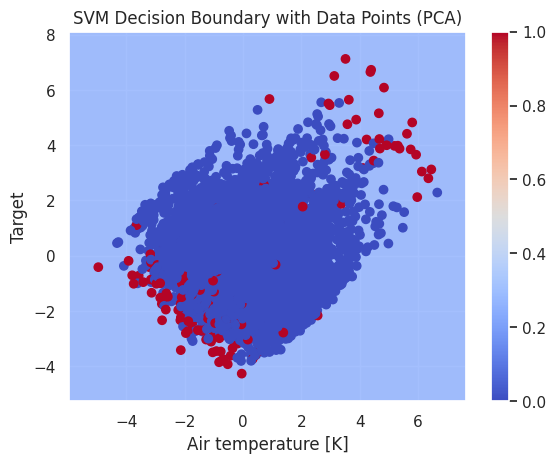

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already trained your SVM model (svm_model)

# Use PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Generate a grid of points to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = svm_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.coolwarm)

# Labeling the axes
plt.xlabel('Air temperature [K]')
plt.ylabel('Target')

# Add a legend
plt.colorbar()

# Add titles and show the plot
plt.title('SVM Decision Boundary with Data Points (PCA)')
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() #impute with the median
        df[col] = df[col].fillna(med)
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)
df.isnull().sum().sum()

0

In [ ]:
df.Target.describe()

count    10000.000000
mean         0.033900
std          0.180981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Target, dtype: float64

In [ ]:
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)

In [ ]:
df.Target.dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df['Target'],class_names = pd.factorize(df['Target'])
print(class_names)
print(df['Target'].unique())

Index([0, 1], dtype='int64')
[0 1]


In [ ]:
df['UDI'],_ = pd.factorize(df['UDI'])
df['Product ID'],_ = pd.factorize(df['Product ID'])
df['Type'],_ = pd.factorize(df['Type'])
df['Air temperature [K]'],_ = pd.factorize(df['Air temperature [K]'])
df['Process temperature [K]'],_ = pd.factorize(df['Process temperature [K]'])
df['Rotational speed [rpm]'],_ = pd.factorize(df['Rotational speed [rpm]'])
df['Torque [Nm]'],_ = pd.factorize(df['Torque [Nm]'])
df['Tool wear [min]'],_ = pd.factorize(df['Tool wear [min]'])
df['Target'],_ = pd.factorize(df['Target'])
df['Failure Type'],_ = pd.factorize(df['Failure Type'])
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,0
2,2,2,1,0,2,2,2,2,0,0
3,3,3,1,1,0,3,3,3,0,0
4,4,4,1,1,1,1,4,4,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   UDI                      10000 non-null  int64
 1   Product ID               10000 non-null  int64
 2   Type                     10000 non-null  int64
 3   Air temperature [K]      10000 non-null  int64
 4   Process temperature [K]  10000 non-null  int64
 5   Rotational speed [rpm]   10000 non-null  int64
 6   Torque [Nm]              10000 non-null  int64
 7   Tool wear [min]          10000 non-null  int64
 8   Target                   10000 non-null  int64
 9   Failure Type             10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df is your DataFrame
X = df
y = df.iloc[:, -1]

# Create a KMeans model with 4 clusters
model = KMeans(n_clusters=4, random_state=123)

# Fit the model to the data
model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=123)

In [ ]:
model.cluster_centers_

array([[6.27750000e+03, 6.27750000e+03, 7.83132530e-01, 6.16321285e+01,
        5.13751004e+01, 3.00430924e+02, 2.04168675e+02, 1.11101205e+02,
        2.04819277e-02, 5.22088353e-02],
       [1.26150040e+03, 1.26150040e+03, 8.17353407e-01, 1.65725040e+01,
        1.46612520e+01, 2.44212361e+02, 1.79559826e+02, 1.06621632e+02,
        2.57527734e-02, 5.38827258e-02],
       [8.76100000e+03, 8.76100000e+03, 8.13484053e-01, 2.27174001e+01,
        2.71098103e+01, 2.96373839e+02, 2.03904320e+02, 1.09442471e+02,
        2.13968510e-02, 4.56197013e-02],
       [3.77799960e+03, 3.77799960e+03, 7.88361897e-01, 6.40765245e+01,
        3.88828218e+01, 3.05227182e+02, 2.01528497e+02, 1.08299721e+02,
        6.77560781e-02, 2.67835791e-01]])

In [ ]:
model.inertia_

11039560104.556118

In [ ]:
labels = model.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2493 out of 10000 samples were correctly labeled.


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


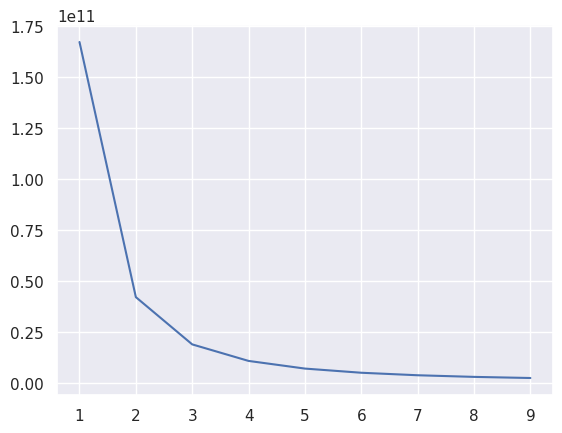

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def elbow_plot(data, maxK=40, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X, maxK=10)

In [ ]:
model = KMeans(n_clusters=1,random_state=123)
model.fit(X)
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("correct %.02f classification " % (correct_labels/float(y.size)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 9652 out of 10000 samples were correctly labeled.
correct 0.97 classification 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support as score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.utils import compute_sample_weight
from xgboost import XGBClassifier

df=pd.read_csv("/content/predictive_maintenance.csv")

# define the target
target_name='Failure Type'


df.drop(columns=['Target'], inplace=True)

# print a summary of the train data
print(df.shape[0])
df.head(3)

# check for missing values
def print_missing_values(df):
    null_df = pd.DataFrame(df.isna().sum(), columns=['null_values']).sort_values(['null_values'], ascending=False)
    fig = plt.subplots(figsize=(16, 6))
    ax = sns.barplot(data=null_df, x='null_values', y=null_df.index, color='royalblue')
    pct_values = [' {:g}'.format(elm) + ' ({:.1%})'.format(elm/len(df)) for elm in list(null_df['null_values'])]
    ax.set_title('Overview of missing values')
    ax.bar_label(container=ax.containers[0], labels=pct_values, size=12)

if df.isna().sum().sum() > 0:
    print_missing_values(df)
else:
    print('no missing values')

# drop all columns with more than 5% missing values
for col_name in df.columns:
    if df[col_name].isna().sum()/df.shape[0] > 0.05:
        df.drop(columns=[col_name], inplace=True)

df.columns
# drop id columns
df_base = df.drop(columns=['Product ID', 'UDI'])

# adjust column names
df_base.rename(columns={'Air temperature [K]': 'air_temperature',
                        'Process temperature [K]': 'process_temperature',
                        'Rotational speed [rpm]':'rotational_speed',
                        'Torque [Nm]': 'torque',
                        'Tool wear [min]': 'tool_wear'}, inplace=True)
df_base.head()

10000
no missing values


,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


<>:44: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:45: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:44: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:45: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?


ValueError: could not convert string to float: 'M'

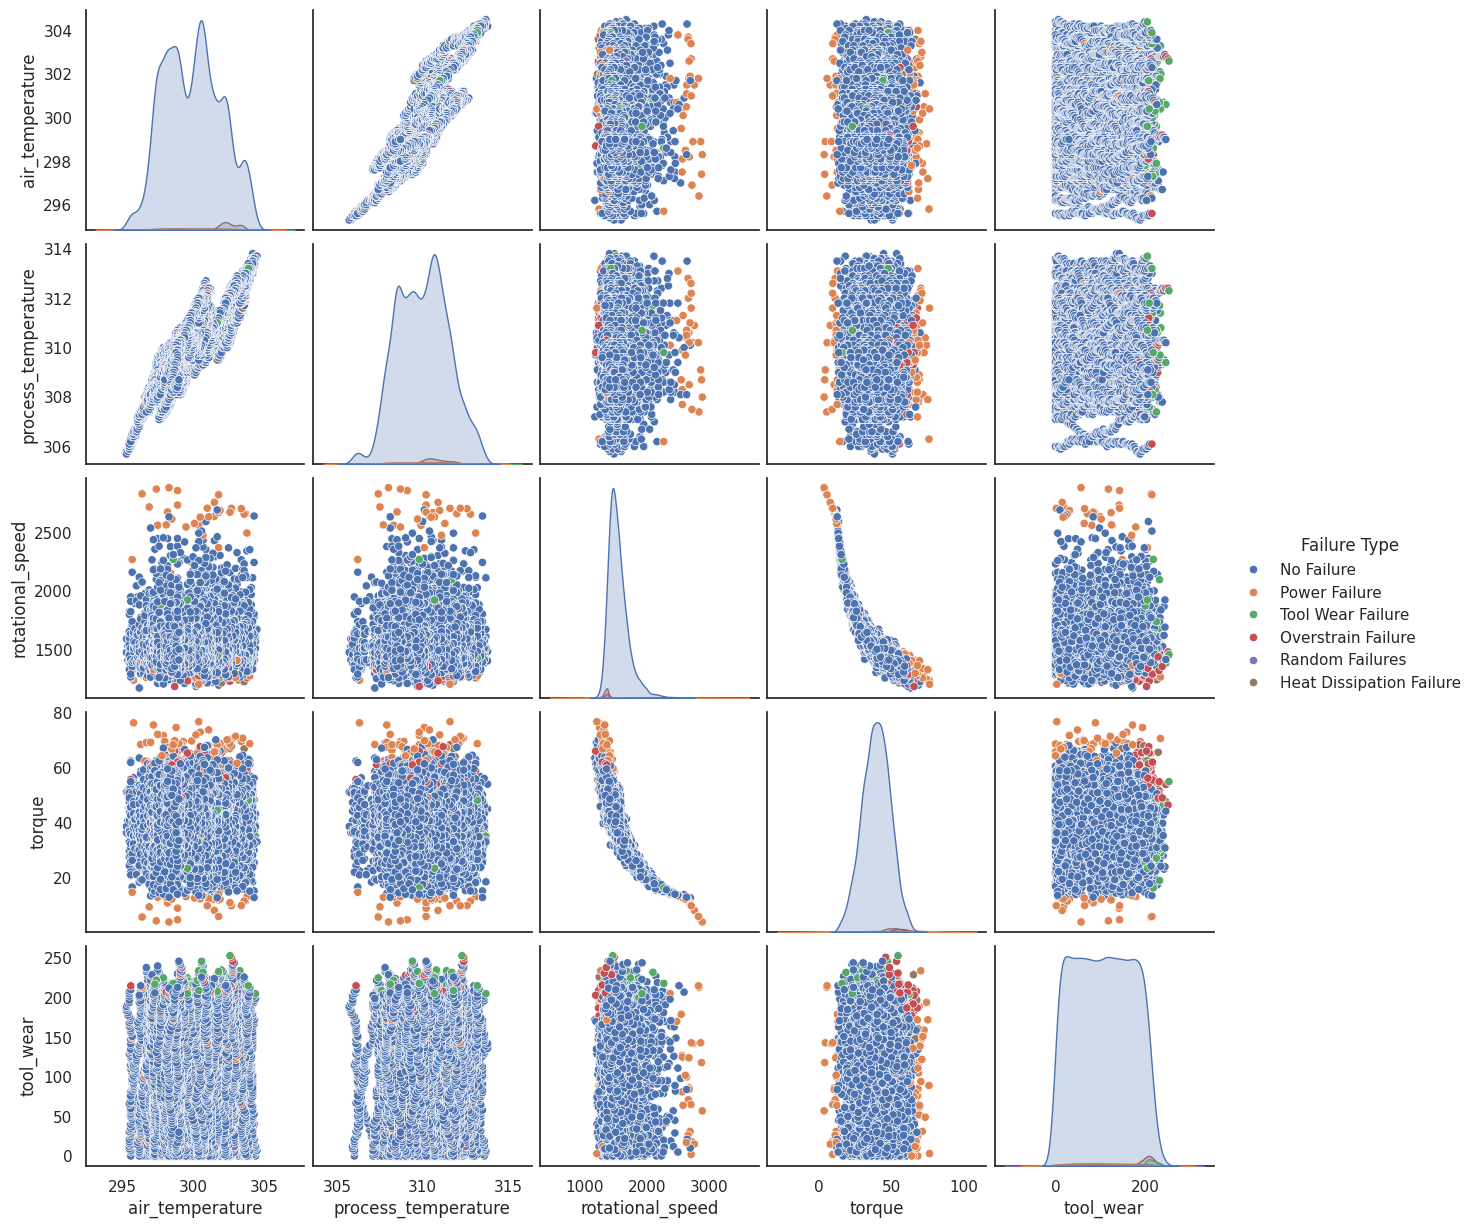

<Figure size 600x400 with 0 Axes>

In [ ]:

# display class distribution of the target variable
px.histogram(df_base, y="Failure Type", color="Failure Type")

# pairplots on failure type
sns.pairplot(df_base, height=2.5, hue='Failure Type')

# correlation plot
plt.figure(figsize=(6,4))
sns.heatmap(df_base.corr(), cbar=True, fmt='.1f', vmax=0.8, annot=True, cmap='Blues')

# create histograms for feature columns separated by target column
def create_histogram(column_name):
    plt.figure(figsize=(16,6))
    return px.box(data_frame=df_base, y=column_name, color='Failure Type', points="all", width=1200)

create_histogram('air_temperature')

create_histogram('process_temperature')

create_histogram('rotational_speed')

create_histogram('torque')

create_histogram('tool_wear')

def data_preparation(df_base, target_name):
    df = df_base.dropna()

    df['target_name_encoded'] = df[target_name].replace({'No Failure': 0, 'Power Failure': 1, 'Tool Wear Failure': 2, 'Overstrain Failure': 3, 'Random Failures': 4, 'Heat Dissipation Failure': 5})
    df['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
    X = df.drop(columns=[target_name, 'target_name_encoded'])
    y = df['target_name_encoded'] #Prediction label

    # split the data into x_train and y_train data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

    # print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
    print('train: ', X_train.shape, y_train.shape)
    print('test: ', X_test.shape, y_test.shape)
    return X, y, X_train, X_test, y_train, y_test

# remove target from training data
X, y, X_train, X_test, y_train, y_test = data_preparation(df_base, target_name)
train:  (7000, 6) (7000,)
test:  (3000, 6) (3000,)

weight_train = compute_sample_weight('balanced', y_train)
weight_test = compute_sample_weight('balanced', y_test)

xgb_clf = XGBClassifier(booster='gbtree',
                        tree_method='gpu_hist',
                        sampling_method='gradient_based',
                        eval_metric='aucpr',
                        objective='multi:softmax',
                        num_class=6)
# fit the model to the data
xgb_clf.fit(X_train, y_train.ravel(), sample_weight=weight_train)

# score the model with the test dataset
score = xgb_clf.score(X_test, y_test.ravel(), sample_weight=weight_test)

# predict on the test dataset
y_pred = xgb_clf.predict(X_test)

# print a classification report
results_log = classification_report(y_test, y_pred)
print(results_log)

# create predictions on the test dataset
y_pred = xgb_clf.predict(X_test)

# print a multi-Class Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8, 5))
sns.set(font_scale=1.1) #for label size
sns.heatmap(df_cm, cbar=True, cmap= "inferno", annot=True, fmt='.0f')

# cross validation
scores  = cross_validate(xgb_clf, X_train, y_train, cv=10, scoring="f1_weighted", fit_params={ "sample_weight" :weight_train})
scores_df = pd.DataFrame(scores)
px.bar(x=scores_df.index, y=scores_df.test_score, width=800)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,plot_precision_recall_curve,precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
df=pd.read_csv('/content/predictive_maintenance.csv')

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["Failure Type"])

In [ ]:
encoded_results_1

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)
encoded_results_2 = labelbinarizer.fit_transform(df["Type"])
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)
df1 = pd.concat([df,df_encoded_1, df_encoded_2], axis=1)
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the columns exist in df1 before dropping them
columns_to_drop = ['Product ID', 'UDI', 'Type', 'Failure Type']
missing_columns = [col for col in columns_to_drop if col not in df1.columns]

if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Drop the specified columns from df1
    df1.drop(columns_to_drop, axis=1, inplace=True)

    # Plot the correlation heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(df1.corr(), annot=True, cmap="RdYlBu")
    plt.show()


Columns not found in DataFrame: ['Product ID', 'UDI', 'Type', 'Failure Type']


In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [ ]:
DF = df1[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
DF.columns=DF.columns.astype("str")
col_name=DF.columns.to_list()
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'H',
 'L',
 'M',
 'Target',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [ ]:
DF = DF.reset_index(drop=True)
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
X = DF.values[:, 0:8].astype("float")
y = DF.values[:,8:].astype("uint8")
print(X.shape)
print(y.shape)

(10000, 8)
(10000, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
y_train.shape

(6700, 7)

In [ ]:
y_test.shape


(3300, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain

# Assuming X_train, X_test, y_train, y_test are defined

# Standardize the features
scaler = StandardScaler().fit(X_test)

# Initialize LGBMClassifier
lgbm = LGBMClassifier()

# Initialize MultiOutputClassifier with LGBMClassifier
model_lgb = MultiOutputClassifier(estimator=lgbm, n_jobs=None)

# Initialize ClassifierChain with LGBMClassifier
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

# Fit the model using ClassifierChain
model_lgb_pred = chain_lgbm.fit(X_train, y_train)

# Evaluate the model
print("Accuracy:", model_lgb_pred.score(X_test, y_test))


[LightGBM] [Info] Number of positive: 7, number of negative: 6693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001045 -> initscore=-6.862907
[LightGBM] [Info] Start training from score -6.862907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
yhat_lgb = model_lgb_pred.predict(X_test)
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_lgb[:,0])))
from sklearn.metrics import accuracy_score, average_precision_score, matthews_corrcoef

# Assuming y_test and yhat_lgb are defined

# Calculate evaluation metrics for each target column
for i in range(y_test.shape[1]):
    print(f"Target {i+1}:")
    print("Accuracy Score: %.4f" % (accuracy_score(y_test[:, i], yhat_lgb[:, i])))
    print("Average Precision Score: %.4f" % (average_precision_score(y_test[:, i], yhat_lgb[:, i])))
    print("Matthews correlation coefficient: %.4f" % (matthews_corrcoef(y_test[:, i], yhat_lgb[:, i])))



Accuracy Score: 0.9885
Target 1:
Accuracy Score: 0.9885
Average Precision Score: 0.6514
Matthews correlation coefficient: 0.7964
Target 2:
Accuracy Score: 0.9852
Average Precision Score: 0.9884
Matthews correlation coefficient: 0.7549
Target 3:
Accuracy Score: 0.9982
Average Precision Score: 0.8372
Matthews correlation coefficient: 0.9137
Target 4:
Accuracy Score: 0.9967
Average Precision Score: 0.5885
Matthews correlation coefficient: 0.7645
Target 5:
Accuracy Score: 0.9967
Average Precision Score: 0.6300
Matthews correlation coefficient: 0.7909
Target 6:
Accuracy Score: 0.9942
Average Precision Score: 0.0055
Matthews correlation coefficient: -0.0013
Target 7:
Accuracy Score: 0.9967
Average Precision Score: 0.0033
Matthews correlation coefficient: 0.0000


Classification Report for Target 1:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3198
           1       0.86      0.75      0.80       102

    accuracy                           0.99      3300
   macro avg       0.93      0.87      0.90      3300
weighted avg       0.99      0.99      0.99      3300



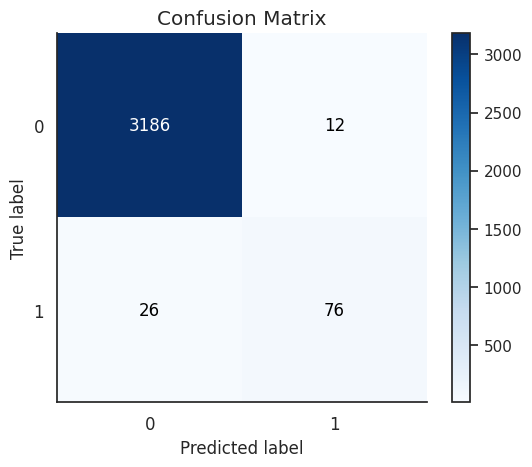

Classification Report for Target 2:
              precision    recall  f1-score   support

           0       0.86      0.67      0.76       113
           1       0.99      1.00      0.99      3187

    accuracy                           0.99      3300
   macro avg       0.93      0.83      0.87      3300
weighted avg       0.98      0.99      0.98      3300



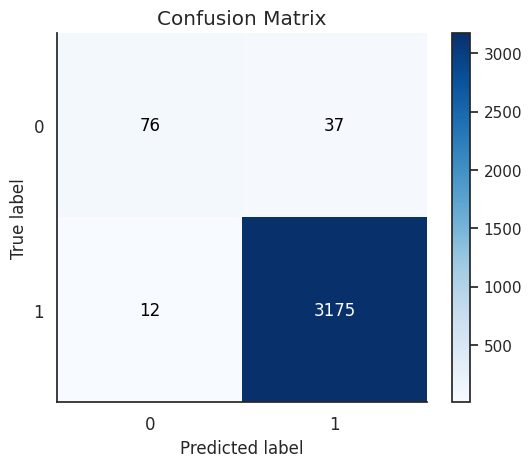

Classification Report for Target 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3266
           1       0.89      0.94      0.91        34

    accuracy                           1.00      3300
   macro avg       0.94      0.97      0.96      3300
weighted avg       1.00      1.00      1.00      3300



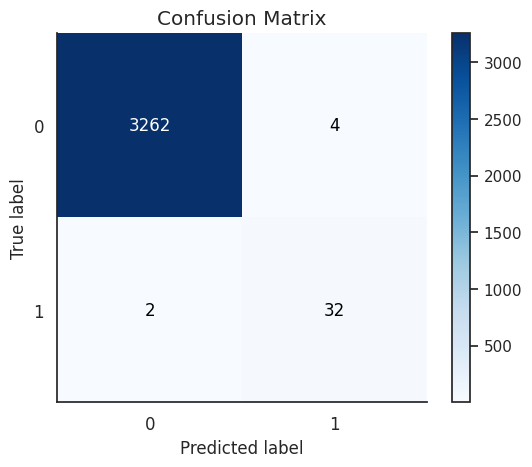

Classification Report for Target 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       0.75      0.78      0.77        23

    accuracy                           1.00      3300
   macro avg       0.87      0.89      0.88      3300
weighted avg       1.00      1.00      1.00      3300



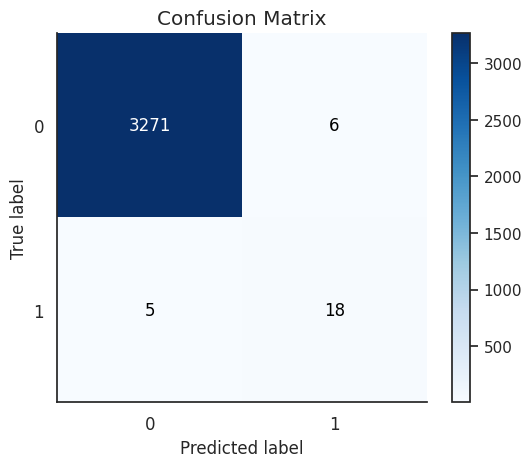

Classification Report for Target 5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3273
           1       0.81      0.78      0.79        27

    accuracy                           1.00      3300
   macro avg       0.90      0.89      0.90      3300
weighted avg       1.00      1.00      1.00      3300



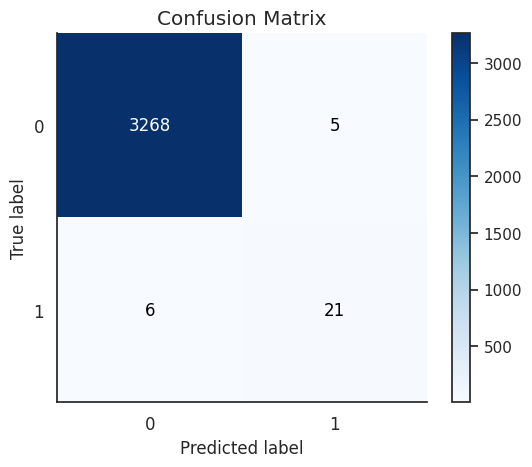

Classification Report for Target 6:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3282
           1       0.00      0.00      0.00        18

    accuracy                           0.99      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      0.99      0.99      3300



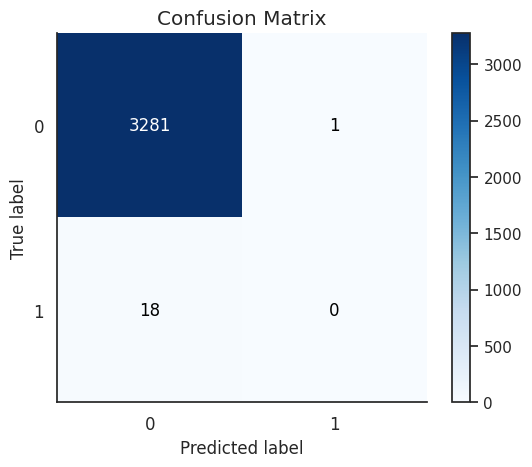

Classification Report for Target 7:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3289
           1       0.00      0.00      0.00        11

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      1.00      3300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



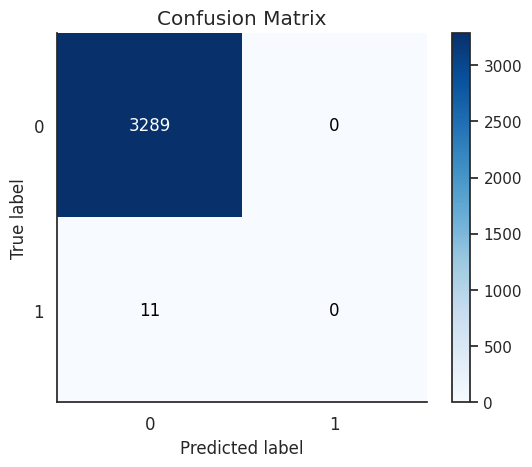

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

# Assuming y_test and yhat_lgb are defined

# Calculate and plot confusion matrix for each target column
for i in range(y_test.shape[1]):
    print(f"Classification Report for Target {i+1}:")
    print(classification_report(y_test[:, i], yhat_lgb[:, i]))
    tn, fp, fn, tp = confusion_matrix(y_test[:, i], yhat_lgb[:, i]).ravel()
    skplt.metrics.plot_confusion_matrix(y_test[:, i], yhat_lgb[:, i], normalize=False)
    plt.show()


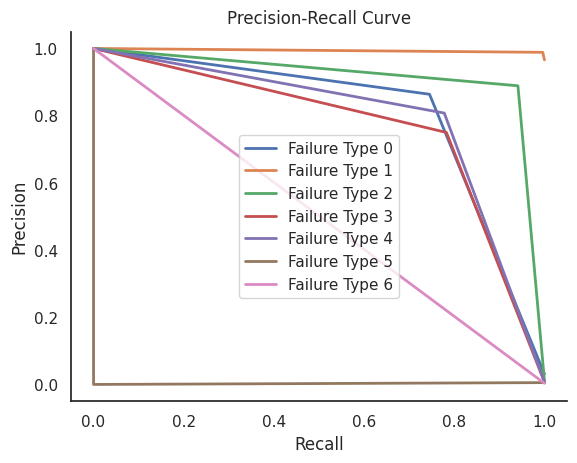

In [ ]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
n_classes = 7

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], yhat_lgb[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
rand = RandomForestClassifier()
rf = MultiOutputClassifier(estimator=rand)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9751515151515151


In [ ]:
yhat_rand = rf.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_rand[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_rand[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_rand[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_rand[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_rand[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_rand[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_rand[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_rand[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_rand[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_rand[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_rand[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_rand[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_rand[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_rand[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_rand[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_rand[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_rand[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_rand[:,5])))


Accuracy Score: 0.9824
Average Precision Score: 0.4612
Matthews correlation coefficient: 0.6605
Accuracy Score: 0.9785
Average Precision Score: 0.9811
Matthews correlation coefficient: 0.6121
Accuracy Score: 0.9936
Average Precision Score: 0.3904
Matthews correlation coefficient: 0.6177
Accuracy Score: 0.9973
Average Precision Score: 0.6114
Matthews correlation coefficient: 0.7791
Accuracy Score: 0.9967
Average Precision Score: 0.5977
Matthews correlation coefficient: 0.7697
Accuracy Score: 0.9945
Average Precision Score: 0.0055
Matthews correlation coefficient: 0.0000


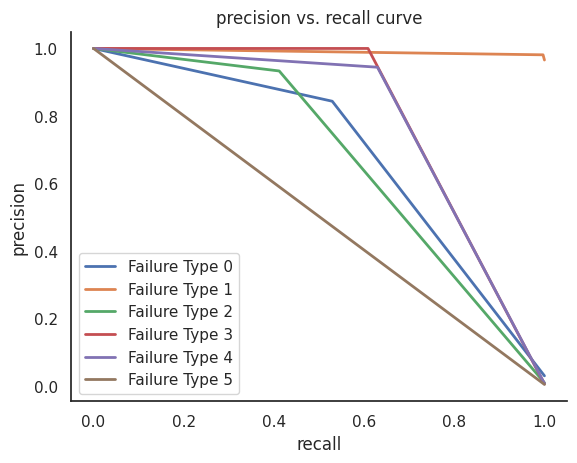

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_rand[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3198
           1       0.84      0.53      0.65       102

    accuracy                           0.98      3300
   macro avg       0.91      0.76      0.82      3300
weighted avg       0.98      0.98      0.98      3300



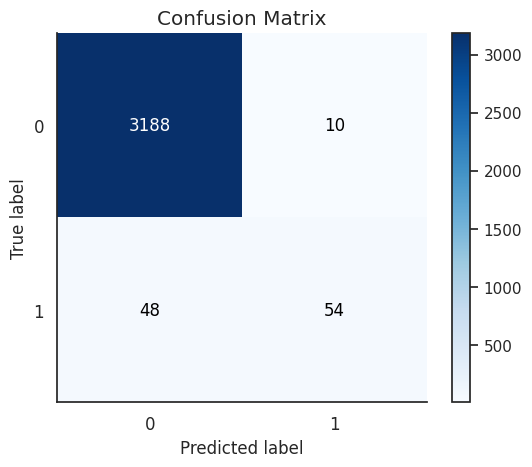

              precision    recall  f1-score   support

           0       0.84      0.46      0.59       113
           1       0.98      1.00      0.99      3187

    accuracy                           0.98      3300
   macro avg       0.91      0.73      0.79      3300
weighted avg       0.98      0.98      0.98      3300



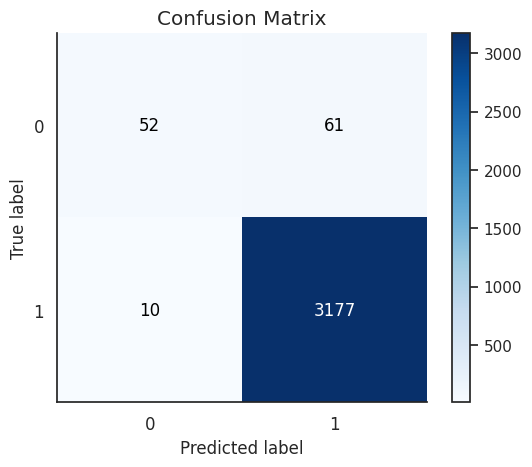

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3266
           1       0.93      0.41      0.57        34

    accuracy                           0.99      3300
   macro avg       0.96      0.71      0.78      3300
weighted avg       0.99      0.99      0.99      3300



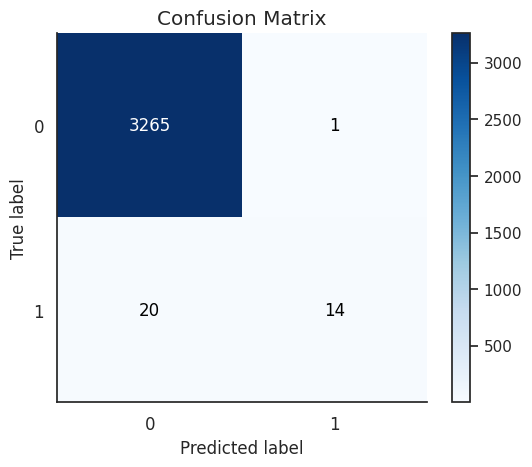

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.61      0.76        23

    accuracy                           1.00      3300
   macro avg       1.00      0.80      0.88      3300
weighted avg       1.00      1.00      1.00      3300



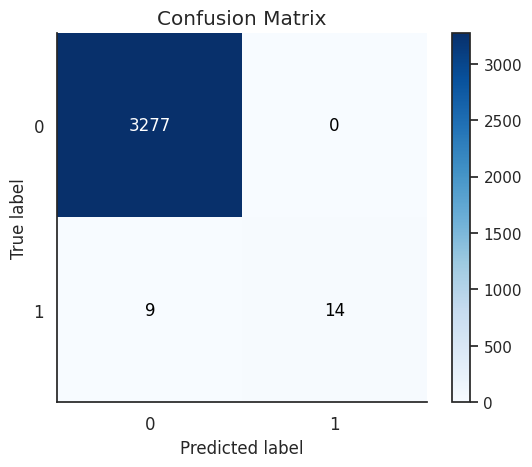

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3273
           1       0.94      0.63      0.76        27

    accuracy                           1.00      3300
   macro avg       0.97      0.81      0.88      3300
weighted avg       1.00      1.00      1.00      3300



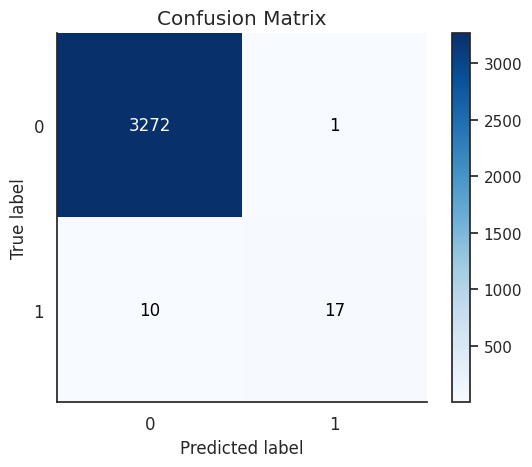

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3282
           1       0.00      0.00      0.00        18

    accuracy                           0.99      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      0.99      0.99      3300



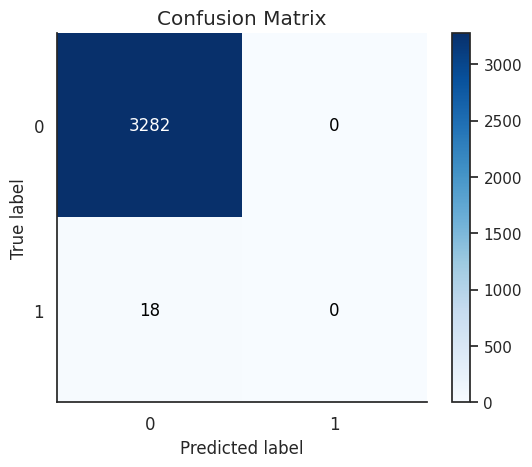

In [ ]:
print(classification_report(y_test[:,0],yhat_rand[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_rand[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_rand[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_rand[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_rand[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_rand[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_rand[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_rand[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_rand[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_rand[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_rand[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_rand[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_rand[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_rand[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_rand[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_rand[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_rand[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_rand[:,5], normalize=False)
plt.show()


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
catb = CatBoostClassifier()
model_catb = MultiOutputClassifier(estimator=catb)


model_catb.fit(X_train, y_train)
print(model_catb.score(X_test, y_test))


yhat_catb = model_catb.predict(X_test)


print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_catb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_catb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_catb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_catb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_catb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_catb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_catb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_catb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_catb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_catb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_catb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_catb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_catb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_catb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_catb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_catb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_catb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_catb[:,5])))

Streaming output truncated to the last 5000 lines.
23:	learn: 0.0883894	total: 201ms	remaining: 8.15s
24:	learn: 0.0818907	total: 224ms	remaining: 8.72s
25:	learn: 0.0766473	total: 240ms	remaining: 9.01s
26:	learn: 0.0721637	total: 254ms	remaining: 9.16s
27:	learn: 0.0676022	total: 269ms	remaining: 9.35s
28:	learn: 0.0637064	total: 279ms	remaining: 9.34s
29:	learn: 0.0606412	total: 286ms	remaining: 9.23s
30:	learn: 0.0568002	total: 296ms	remaining: 9.25s
31:	learn: 0.0537522	total: 305ms	remaining: 9.23s
32:	learn: 0.0507468	total: 312ms	remaining: 9.13s
33:	learn: 0.0486216	total: 320ms	remaining: 9.09s
34:	learn: 0.0458661	total: 329ms	remaining: 9.06s
35:	learn: 0.0435695	total: 337ms	remaining: 9.02s
36:	learn: 0.0415633	total: 346ms	remaining: 9s
37:	learn: 0.0392960	total: 355ms	remaining: 8.98s
38:	learn: 0.0371886	total: 363ms	remaining: 8.95s
39:	learn: 0.0354135	total: 372ms	remaining: 8.93s
40:	learn: 0.0346231	total: 393ms	remaining: 9.19s
41:	learn: 0.0331078	total: 402ms	

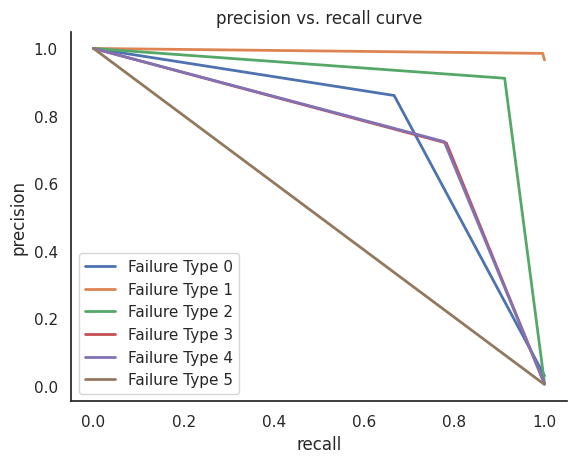

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_catb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming y_train and y_test are one-hot encoded

ovr_model = OneVsRestClassifier(model_catb)
ovr_model.fit(X_train, y_train)
yhat_ovr = ovr_model.predict_proba(X_test)  # Use predict_proba for probability estimates

for i in range(n_classes):
    print(f"Classification Report for Failure Type {i}:")
    print(classification_report(y_test[:, i], yhat_ovr[:, i] > 0.5))  # Compare probabilities with threshold

    plot_roc_curve(y_test[:, i], yhat_ovr[:, i])
    plt.title(f"ROC Curve for Failure Type {i}")
    plt.show()

    plot_precision_recall_curve(y_test[:, i], yhat_ovr[:, i])
    plt.title(f"Precision-Recall Curve for Failure Type {i}")
    plt.show()


ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n=100
X=np.random.rand(n,2)
y=np.sign(np.random.rand(n)-0.5)
def(linear_model(X,w)):
  return np.dot(X,w)
  def rademachar_complexity(X,y,model,num_samples=1000):
    m,d=X.shape
